In [ ]:
#########################################################################################################################################################
#
# *  Decission-Tree
# *  Nutzen und Einsatz von verschiedenen Kommentaren
# *  Purpose: beeing able to create well understandable code
# *  
# *  @file      Decission-Tree.ipnb
# *  @author    Tjark Ziehm
# *  @version   0.1 2.November 2021 
# *  @gitbook   https://app.gitbook.com/s/-MjY9ZUOIiOq3c33tSsV/quantum-informatic/euer-privater-vorkurs/decissiontrees
# *  @Orange3   
# *  
# *  The goal of this file is to show the usage of decission tree algorithm based on modified data
# *  Algorithm: ID3, C4.5, C5.0 and CART
# *
# *  ID3 (Iterative Dichotomiser 3)  ( Gain Ratio )
# *  C4.5 as the successor to ID3    ( Gain Ratio )
# *  C5.0 is Quinlan’s latest version release under a proprietary license
# *  CART (Classification and Regression Trees) is very similar to C4.5 ( Gini index )
# */
#########################################################################################################################################################


## Generelle Information zu Decission-Trees ( Entscheidungsbaumen ) 
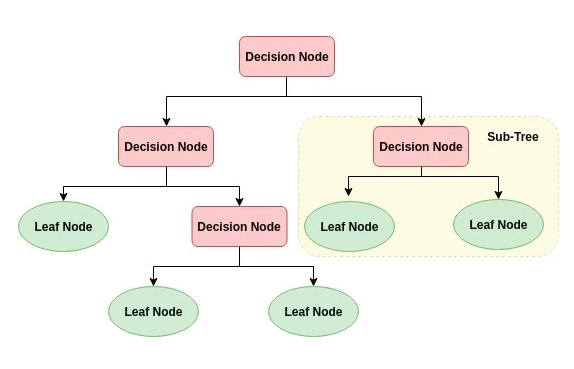

### Die Grundidee hinter jedem Entscheidungsbaum-Algorithmus ist die folgende:

1.    Auswahl des besten Attributs mit Hilfe von Attribute Selection Measures (ASM) zur Aufteilung der Datensätze.
2.    Machen Sie dieses Attribut zu einem Entscheidungsknoten und unterteilen Sie den Datensatz in kleinere Teilmengen.
3.    Beginnt mit dem Aufbau des Baums, indem dieser Prozess für jedes Kind rekursiv wiederholt wird, bis eine der Bedingungen erfüllt ist:
      - Alle Tupel gehören zu demselben Attributwert.
      - Es gibt keine verbleibenden Attribute mehr.
      - Es sind keine weiteren Instanzen vorhanden

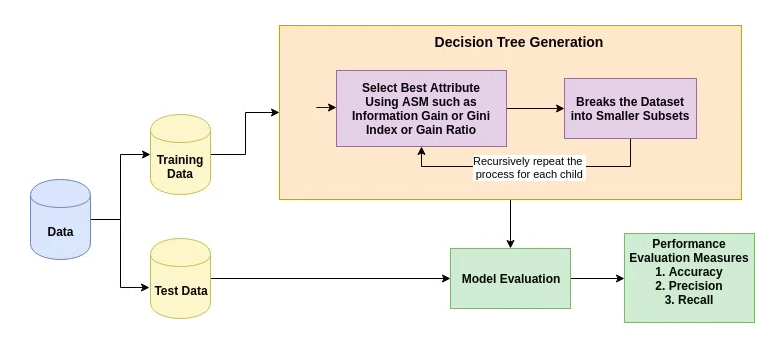

In [ ]:
#########################################################################################################

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss


In [2]:
# Load Data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
diabetes = pd.read_csv("diabetes.csv", header=0, names=col_names)

In [3]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature Selection

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

### Splitting Data

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

Accuracy: 1.0


### Visualizing Decision Trees

https://anaconda.org/anaconda/six

In [8]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier()

# Step 3: Train the model on the data
clf.fit(X_train, y_train)

# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

[Text(167.4, 163.07999999999998, 'X[8] <= 0.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 354\nvalue = [354, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 183\nvalue = [0, 183]')]

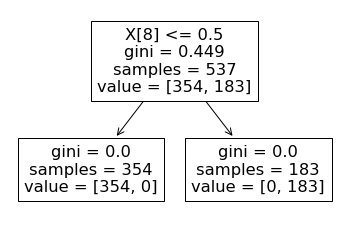

In [9]:
tree.plot_tree(clf)

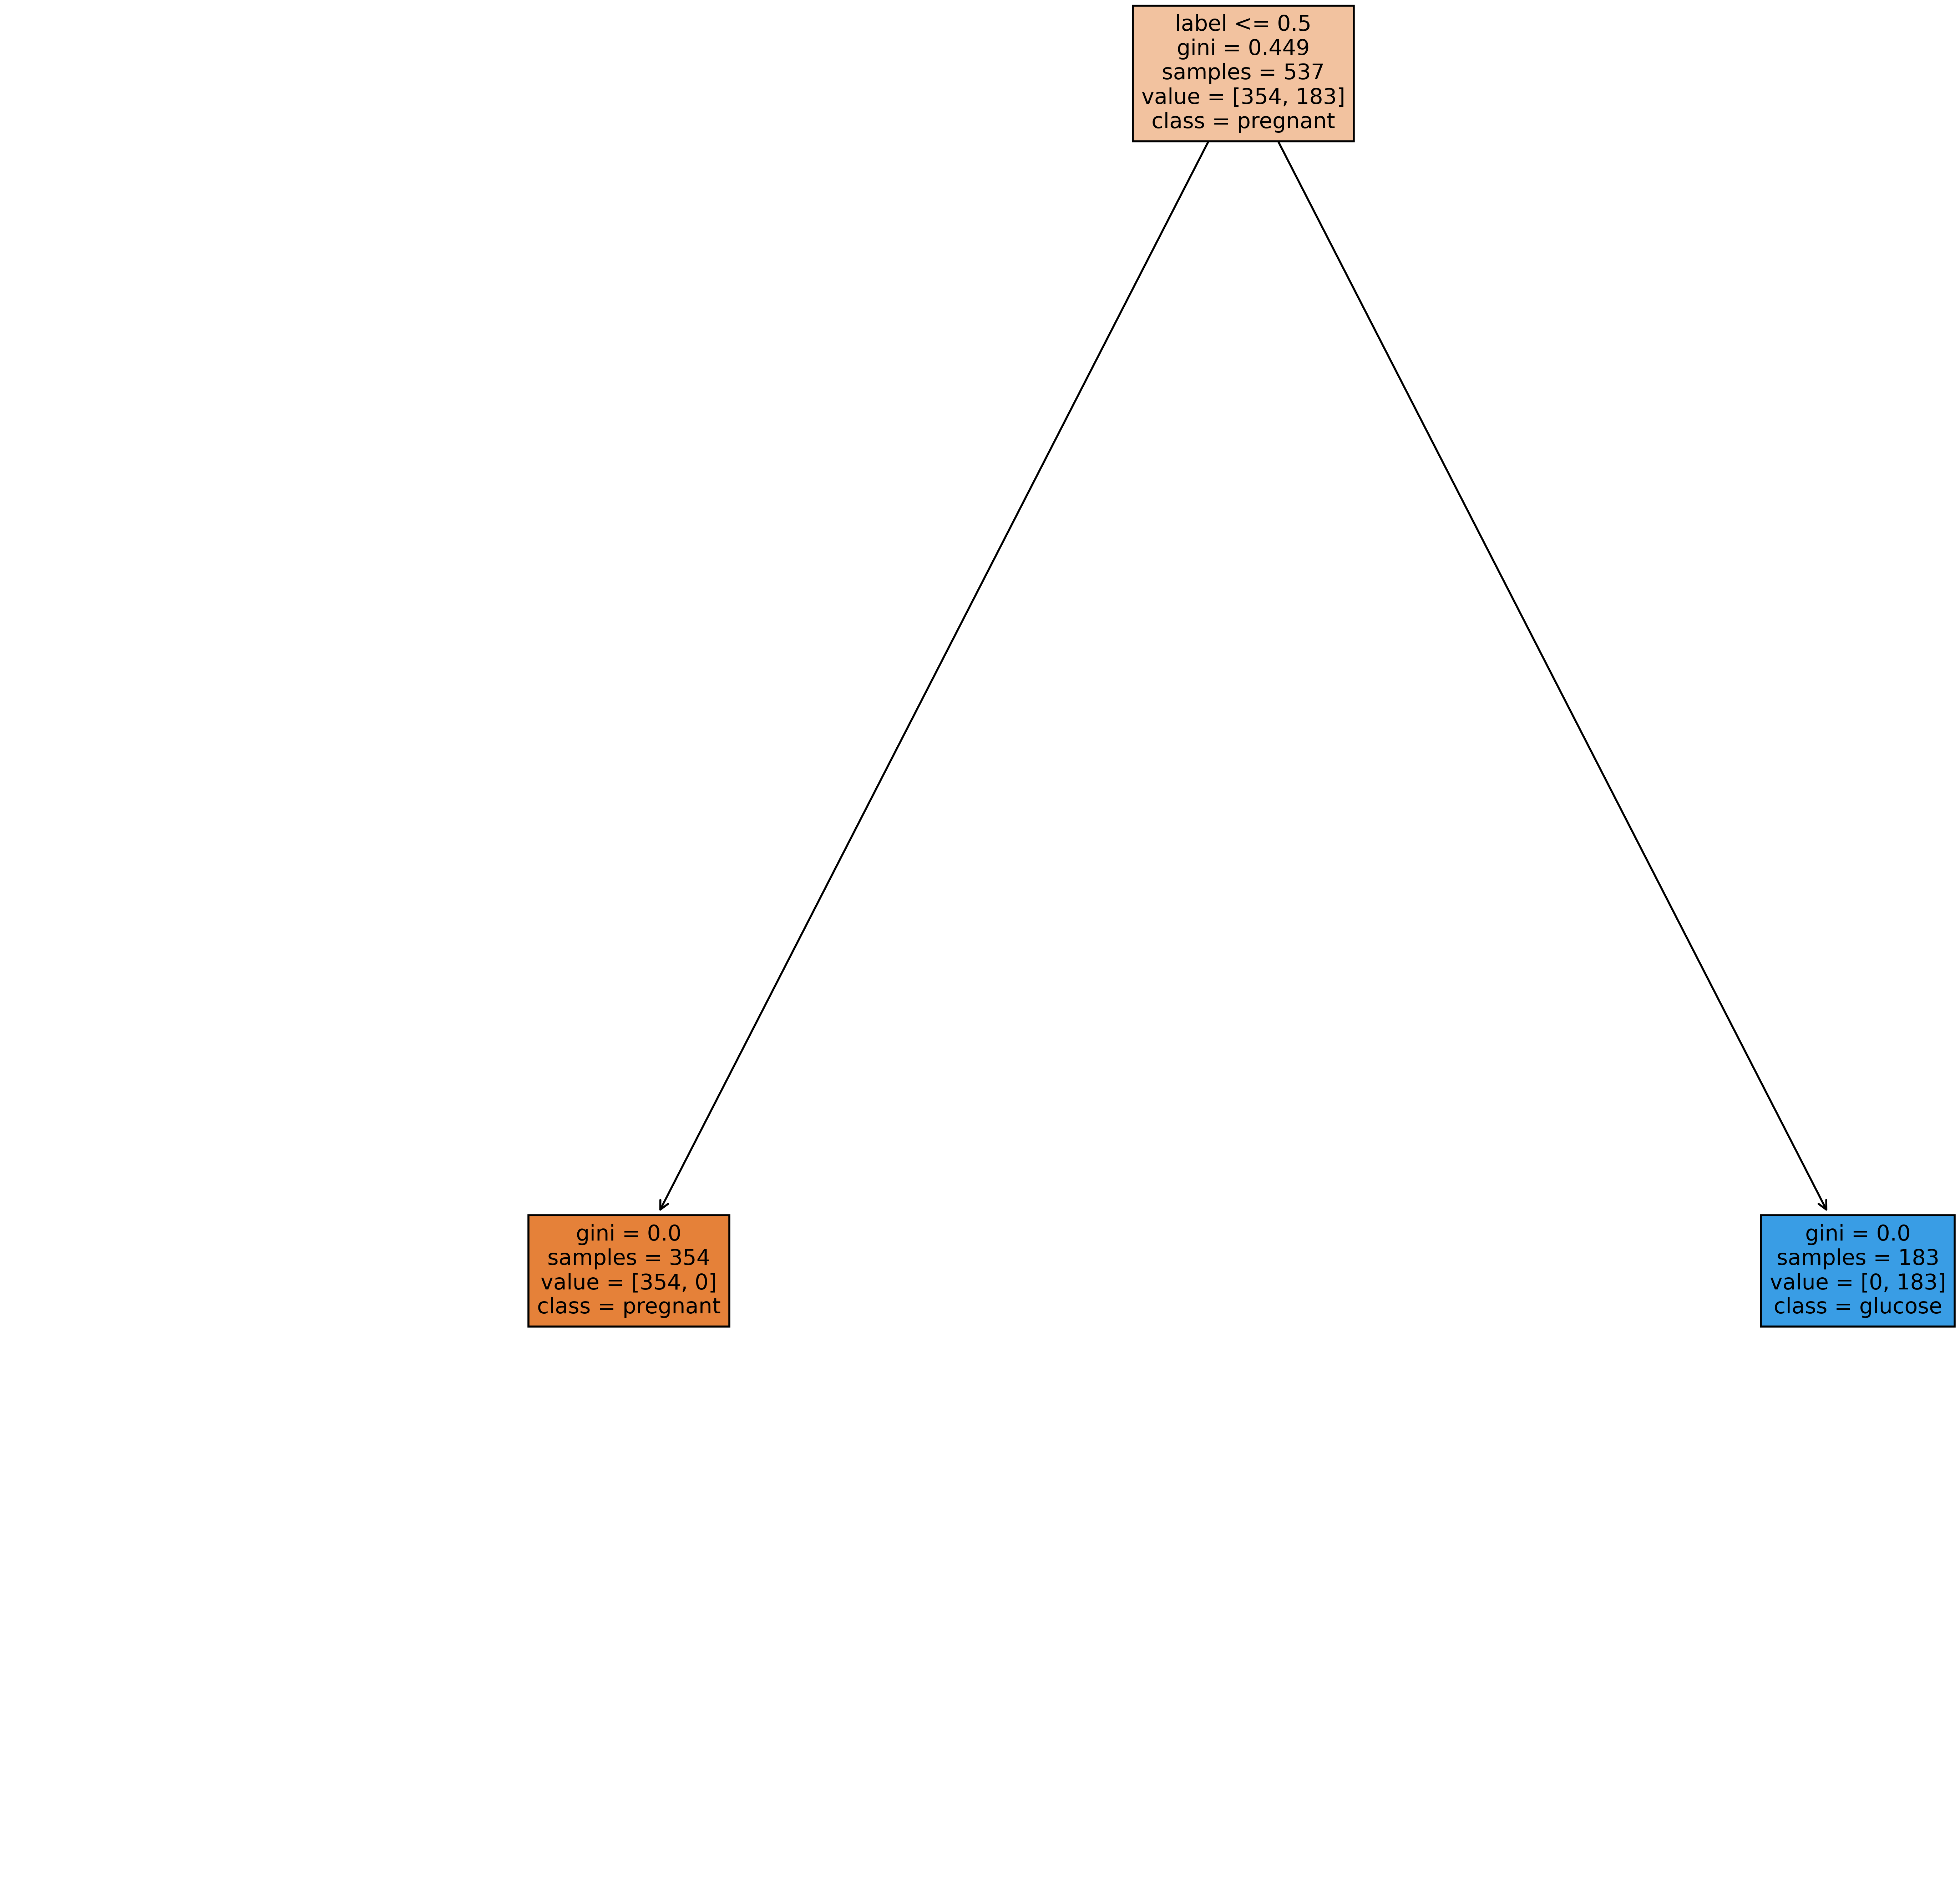

In [10]:
#feature_cols = ['pregnant','insulin', 'bmi', 'age','glucose','bp','pedigree']

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)

tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=col_names,
               filled = True);

fig.savefig('tree_diabetes.png')